In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 1. Dataset Exploration: 
# • Load the dataset and explore its structure.
#  • Identify the target variable and potential features for linear regression
#  the target is price
# the potential features all of cols without id ,date and zipcode 

In [3]:
df = pd.read_csv(r"house_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# 2. Data Preprocessing:
#  • Handle missing values: Decide on an appropriate strategy (imputation, removal, etc.).
#  • Explore and address outliers if present.
#  • Check for and handle any categorical features using encoding techniques.

#  3. Exploratory Data Analysis (EDA): 
# • Visualize the distribution of the target variable.
#  • Examine the relationships

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df.drop(columns=['id','date','zipcode'],inplace=True)

In [19]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='price'>

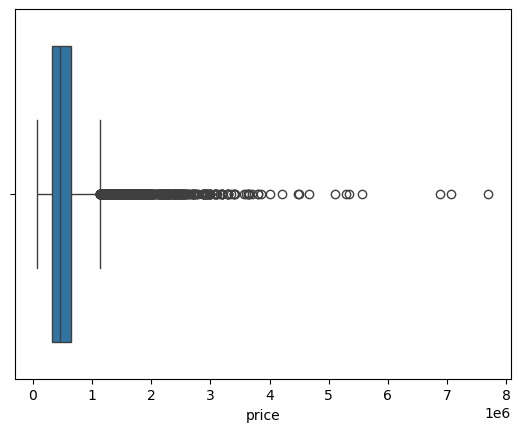

In [21]:
sns.boxplot(data=df,x='price')

In [35]:
q1 = df.price.quantile(.25)
q3= df.price.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)

In [37]:
df= df[(df['price']>= lower_bound) & (df['price'] <= upper_bound)]

<Axes: xlabel='price'>

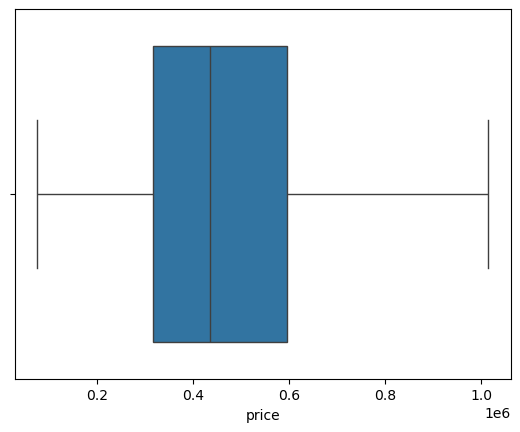

In [39]:
sns.boxplot(data=df,x='price')

In [41]:
df.price.unique()

array([ 221900.,  538000.,  180000., ...,  610685., 1007500.,  402101.])

## Examine the relationships between features and the target through pair plots orcorrelation matrices.

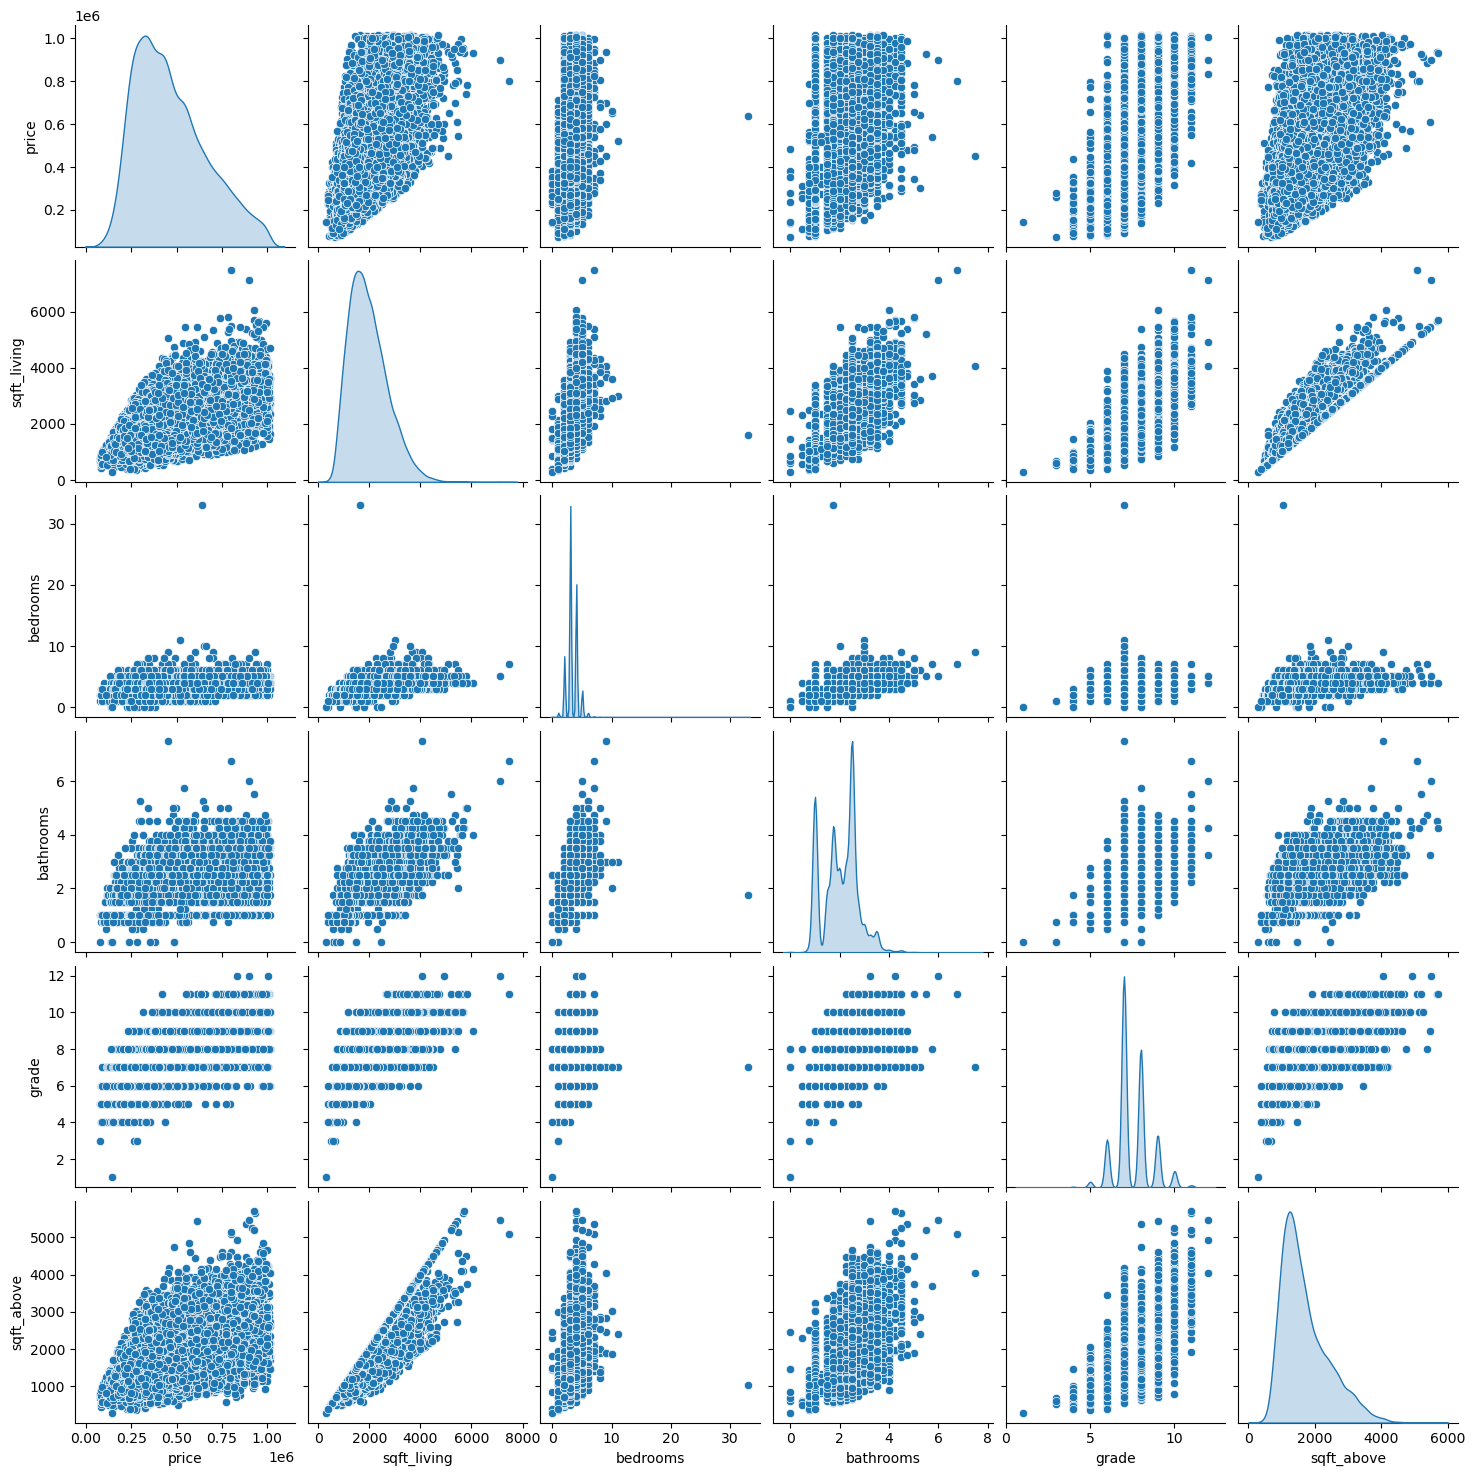

In [47]:
sns.pairplot(data=df[['price','sqft_living','bedrooms','bathrooms','grade','sqft_above']],diag_kind='kde')
plt.show()

## Check for and handle any categorical features using encoding techniques.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20186 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20186 non-null  float64
 1   bedrooms       20186 non-null  int64  
 2   bathrooms      20186 non-null  float64
 3   sqft_living    20186 non-null  int64  
 4   sqft_lot       20186 non-null  int64  
 5   floors         20186 non-null  float64
 6   waterfront     20186 non-null  int64  
 7   view           20186 non-null  int64  
 8   condition      20186 non-null  int64  
 9   grade          20186 non-null  int64  
 10  sqft_above     20186 non-null  int64  
 11  sqft_basement  20186 non-null  int64  
 12  yr_built       20186 non-null  int64  
 13  yr_renovated   20186 non-null  int64  
 14  lat            20186 non-null  float64
 15  long           20186 non-null  float64
 16  sqft_living15  20186 non-null  int64  
 17  sqft_lot15     20186 non-null  int64  
dtypes: float64(

In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### there isn't any categorcal values to be encoded

## Feature Scaling:

In [56]:
df['house_age'] = 2025 - df['yr_built']

In [58]:
df.drop(columns='yr_built',inplace=True)

In [60]:
df['renovated'] = (df['yr_renovated'] > 0).astype(int)

In [62]:
df.drop(columns='yr_renovated',inplace=True)

In [64]:
from sklearn.preprocessing import RobustScaler

In [66]:
scaler=RobustScaler()

In [68]:
df_cols_scale=[
    'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
    'view','condition','grade','sqft_above','sqft_basement',
    'sqft_living15','sqft_lot15','house_age','lat','long'
]

In [70]:
df[df_cols_scale]=scaler.fit_transform(df[df_cols_scale])

In [72]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,0.0,-1.00,-0.647059,-0.351711,0.0,0,0.0,0.0,0.0,-0.362637,0.00,-0.246175,-0.115523,-0.5625,-0.391291,0.422222,0
1,538000.0,0.0,0.25,0.715686,-0.049049,1.0,0,0.0,0.0,0.0,0.725275,0.80,0.698020,-0.413959,-0.1250,0.023127,0.511111,1
2,180000.0,-1.0,-1.00,-1.049020,0.475285,0.0,0,0.0,0.0,-1.0,-0.813187,0.00,0.774077,0.000000,1.1625,0.111262,0.911111,0
3,604000.0,1.0,1.00,0.117647,-0.475285,0.0,0,0.0,2.0,0.0,-0.505495,1.82,-0.202970,-0.770156,-0.5375,-0.526722,0.200000,0
4,510000.0,0.0,0.00,-0.156863,0.110266,0.0,0,0.0,0.0,1.0,0.186813,0.00,0.229073,0.904934,0.0125,-0.005209,-0.288889,0


## 5. Train-Test Split: • Split the dataset into training and testing sets.

In [75]:
from sklearn.model_selection import train_test_split

In [121]:
x = df.drop(columns={'price'})
y = df.price

In [123]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=27)

## Linear Regression Model & Model Evaluation:

In [126]:
lr=LinearRegression()

In [128]:
lr.fit(x_train,y_train)

LinearRegression()

In [130]:
y_pred=lr.predict(x_test)

In [132]:
R2=r2_score(y_test,y_pred)
R2

0.6709700524126432